<div align="center">
    <img src="../assets/dataset-cover.png" />
    <h1><b>16 Personalities | 1. Data exploration and preperation</b></h1>
    <hr />
</div>

In [2]:
import pandas as pd

df = pd.read_csv('../data/original/question_data.csv', encoding='latin-1')
print(df.info())
df.head()

# Drop Response ID column
df.drop('Response Id', axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Data columns (total 62 columns):
 #   Column                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                --------------  ----- 
 0   Response Id                                                                                                           59999 non-null  int64 
 1   You regularly make new friends.                                                                                       59999 non-null  int64 
 2   You spend a lot of your free time exploring various random topics that pique your interest                            59999 non-null  int64 
 3   Seeing other people cry can easily make you feel like you want to cry too                                             59999 non-null  int64 
 4   You often 

## **1.1 Personality Distribution**

<hr/>

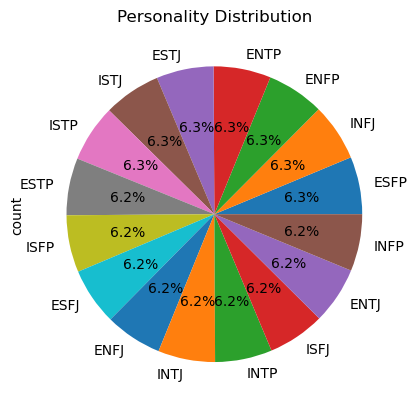

In [3]:
import matplotlib.pyplot as plt

# Plot the personalities in a pie chart
df['Personality'].value_counts().plot.pie(autopct='%1.1f%%')

plt.title('Personality Distribution')
plt.show()


> Data is evenly distributed

## **1.2 Mapping columns**

<hr />

In [4]:

new = ['Q'+str(i) for i in range(1,len(df.columns))] # Create new column names
old = df.columns

# Rename columns in original dataframe
df.rename(columns=dict(zip(old, new)), inplace=True)

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Data columns (total 61 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Q1           59999 non-null  int64 
 1   Q2           59999 non-null  int64 
 2   Q3           59999 non-null  int64 
 3   Q4           59999 non-null  int64 
 4   Q5           59999 non-null  int64 
 5   Q6           59999 non-null  int64 
 6   Q7           59999 non-null  int64 
 7   Q8           59999 non-null  int64 
 8   Q9           59999 non-null  int64 
 9   Q10          59999 non-null  int64 
 10  Q11          59999 non-null  int64 
 11  Q12          59999 non-null  int64 
 12  Q13          59999 non-null  int64 
 13  Q14          59999 non-null  int64 
 14  Q15          59999 non-null  int64 
 15  Q16          59999 non-null  int64 
 16  Q17          59999 non-null  int64 
 17  Q18          59999 non-null  int64 
 18  Q19          59999 non-null  int64 
 19  Q20          59999 non-nu

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Personality
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,-1,0,0,0,0,0,ENFP
1,0,0,-2,-3,-1,2,-2,0,3,0,...,0,-2,0,2,0,-1,-1,-1,3,ISFP
2,0,0,2,0,-1,2,0,0,1,0,...,0,2,0,2,-1,0,1,2,1,INFJ
3,0,-1,3,-1,0,0,-2,0,-2,0,...,0,0,-1,-1,0,1,0,-2,-1,ISTP
4,0,0,-1,0,2,-1,-2,0,1,0,...,0,1,0,2,0,1,-1,2,-1,ENFJ


## **1.3 Mapping question numbers to descriptions**

<hr />

In [5]:
# Create a dataframe with the questions and their number (new, old - personality column)
question_df = pd.DataFrame({'number': new, 'description': old[:-1]})


question_df

,number,description
0,Q1,You regularly make new friends.
1,Q2,You spend a lot of your free time exploring va...
2,Q3,Seeing other people cry can easily make you fe...
3,Q4,You often make a backup plan for a backup plan.
4,Q5,"You usually stay calm, even under a lot of pre..."
5,Q6,"At social events, you rarely try to introduce ..."
6,Q7,You prefer to completely finish one project be...
7,Q8,You are very sentimental.
8,Q9,You like to use organizing tools like schedule...
9,Q10,Even a small mistake can cause you to doubt yo...


## **1.4 Mapping personality codes**

<hr />

In [6]:
# Map the personality types to numbers for classification
personality_nums = {
    'ESTJ': 0,
    'ENTJ': 1,
    'ESFJ': 2,
    'ENFJ': 3,
    'ISTJ': 4,
    'ISFJ': 5,
    'INTJ': 6,
    'INFJ': 7,
    'ESTP': 8,
    'ESFP': 9,
    'ENTP': 10,
    'ENFP': 11,
    'ISTP': 12,
    'ISFP': 13,
    'INTP': 14,
    'INFP': 15
}


# Change the personality column to numbers
df['Personality'] = df['Personality'].map(personality_nums)

df['Personality'].value_counts()

Personality
9     3769
7     3761
11    3760
10    3760
0     3759
4     3756
12    3755
8     3749
13    3746
2     3746
3     3743
6     3743
14    3742
5     3739
1     3737
15    3734
Name: count, dtype: int64

In [7]:
# Map the personality codes to their respective titles
personality_mapped = {
    "ESTJ": "The Supervisor",
    "ENTJ": "The Commander",
    "ESFJ": "The Provider",
    "ENFJ": "The Giver",
    "ISTJ": "The Inspector",
    "ISFJ": "The Nurturer",
    "INTJ": "The Mastermind",
    "INFJ": "The Counselor",
    "ESTP": "The Doer",
    "ESFP": "The Performer",
    "ENTP": "The Visionary",
    "ENFP": "The Champion",
    "ISTP": "The Craftsman",
    "ISFP": "The Composer",
    "INTP": "The Thinker",
    "INFP": "The Idealist"
}

# Create a dataframe with the personality codes and their description
personality_df = pd.DataFrame(list(personality_mapped.items()), columns=['code', 'title'])

personality_df

,code,title
0,ESTJ,The Supervisor
1,ENTJ,The Commander
2,ESFJ,The Provider
3,ENFJ,The Giver
4,ISTJ,The Inspector
5,ISFJ,The Nurturer
6,INTJ,The Mastermind
7,INFJ,The Counselor
8,ESTP,The Doer
9,ESFP,The Performer


## **1.5 Saving new dataframes**

<hr />

In [8]:
# Save cleaned original dataframe to a new csv file
df.to_csv('../data/respondent_data.csv', index=False)
print('Cleaned respondent data saved to file to ../data/respondent_data.csv')

# Save the question mapping dataframe to a new csv file
question_df.to_csv('../data/question_data.csv', index=False)
print('Question mapping data saved to file to ../data/question_data.csv')

# Save the personality mapping dataframe to a new csv file
personality_df.to_csv('../data/personality_data.csv', index=False)
print('Personality mapping data saved to file to ../data/personality_data.csv')

Cleaned respondent data saved to file to ../data/respondent_data.csv
Question mapping data saved to file to ../data/question_data.csv
Personality mapping data saved to file to ../data/personality_data.csv
